<a href="https://colab.research.google.com/github/yongjuncho123/dust/blob/main/Dust_Job02_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import plotly.express as px
import datetime

In [ ]:
name_abb = ["DJ", "GD", "GJ", "GN", "GS", "MP", "SCH", "SD", "SP", "YDP", "YS"]

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data/project02_dust/최종 데이터/Real_total/real_total_GD.csv')

df

,일시,구분,미세먼지(PM10),초미세먼지(PM25),기온(°C),강수량(mm),풍향(16방위),풍향범주_corr,풍향범주,SO2,CO,O3,NO2,측정장소
0,2016-01-01 00:00:00,강동구,87.0,51.0,-1.9,0.0,0.0,1.0,북,0.004,1.2,0.002,0.050,서울 강동구 구천면로 42길 59
1,2016-01-01 01:00:00,강동구,82.0,44.0,-2.1,0.0,90.0,3.0,동,0.004,1.2,0.002,0.048,서울 강동구 구천면로 42길 59
2,2016-01-01 02:00:00,강동구,97.0,58.0,-2.2,0.0,0.0,1.0,북,0.004,1.1,0.002,0.044,서울 강동구 구천면로 42길 59
3,2016-01-01 03:00:00,강동구,88.0,53.0,-2.5,0.0,90.0,3.0,동,0.004,1.0,0.002,0.041,서울 강동구 구천면로 42길 59
4,2016-01-01 04:00:00,강동구,90.0,52.0,-2.9,0.0,70.0,2.0,북동,0.004,1.0,0.002,0.039,서울 강동구 구천면로 42길 59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35056,2019-12-31 19:00:00,강동구,24.0,18.0,-6.9,0.0,290.0,8.0,북서,0.003,0.5,0.013,0.028,서울 강동구 구천면로 42길 59
35057,2019-12-31 20:00:00,강동구,23.0,17.0,-7.0,0.0,290.0,8.0,북서,0.003,0.4,0.015,0.025,서울 강동구 구천면로 42길 59
35058,2019-12-31 21:00:00,강동구,25.0,19.0,-7.4,0.0,20.0,2.0,북동,0.003,0.4,0.015,0.023,서울 강동구 구천면로 42길 59
35059,2019-12-31 22:00:00,강동구,24.0,17.0,-8.2,0.0,0.0,1.0,북,0.003,0.5,0.004,0.040,서울 강동구 구천면로 42길 59


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35061 entries, 0 to 35060
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   일시           35061 non-null  object 
 1   구분           35061 non-null  object 
 2   미세먼지(PM10)   35061 non-null  float64
 3   초미세먼지(PM25)  35061 non-null  float64
 4   기온(°C)       35061 non-null  float64
 5   강수량(mm)      35061 non-null  float64
 6   풍향(16방위)     35061 non-null  float64
 7   풍향범주_corr    35061 non-null  float64
 8   풍향범주         35061 non-null  object 
 9   SO2          34131 non-null  float64
 10  CO           34640 non-null  float64
 11  O3           34574 non-null  float64
 12  NO2          34638 non-null  float64
 13  측정장소         35061 non-null  object 
dtypes: float64(10), object(4)
memory usage: 3.7+ MB


In [ ]:
pu16 = pd.read_csv('/content/drive/MyDrive/data/project02_dust/최종 데이터/풍향/16년 풍속.csv', encoding = 'cp949')
pu17 = pd.read_csv('/content/drive/MyDrive/data/project02_dust/최종 데이터/풍향/17년 풍속.csv', encoding = 'cp949')
pu18 = pd.read_csv('/content/drive/MyDrive/data/project02_dust/최종 데이터/풍향/18년 풍속.csv', encoding = 'cp949')
pu19 = pd.read_csv('/content/drive/MyDrive/data/project02_dust/최종 데이터/풍향/19년 풍속.csv', encoding = 'cp949')

pu16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   지점       8784 non-null   int64  
 1   지점명      8784 non-null   object 
 2   일시       8784 non-null   object 
 3   풍속(m/s)  8784 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 274.6+ KB


In [ ]:
pu17

,지점,지점명,일시,풍속(m/s)
0,108,서울,2017-01-01 00:00,2.2
1,108,서울,2017-01-01 01:00,1.4
2,108,서울,2017-01-01 02:00,1.9
3,108,서울,2017-01-01 03:00,2.0
4,108,서울,2017-01-01 04:00,1.6
...,...,...,...,...
8711,108,서울,2017-12-31 19:00,2.2
8712,108,서울,2017-12-31 20:00,0.9
8713,108,서울,2017-12-31 21:00,1.0
8714,108,서울,2017-12-31 22:00,1.7


## 시각화 전처리

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35061 entries, 0 to 35060
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   일시           35061 non-null  object 
 1   구분           35061 non-null  object 
 2   미세먼지(PM10)   35061 non-null  float64
 3   초미세먼지(PM25)  35061 non-null  float64
 4   기온(°C)       35061 non-null  float64
 5   강수량(mm)      35061 non-null  float64
 6   풍향(16방위)     35061 non-null  float64
 7   풍향범주_corr    35061 non-null  float64
 8   풍향범주         35061 non-null  object 
 9   SO2          34131 non-null  float64
 10  CO           34640 non-null  float64
 11  O3           34574 non-null  float64
 12  NO2          34638 non-null  float64
 13  측정장소         35061 non-null  object 
dtypes: float64(10), object(4)
memory usage: 3.7+ MB


In [ ]:
df['일시'] = pd.to_datetime(df['일시'])

In [ ]:
pu16['일시'] = pd.to_datetime(pu16['일시'])
pu17['일시'] = pd.to_datetime(pu17['일시'])
pu18['일시'] = pd.to_datetime(pu18['일시'])
pu19['일시'] = pd.to_datetime(pu19['일시'])

In [ ]:
total16 = pd.merge(df, pu16, on = '일시')
total17 = pd.merge(df, pu17, on = '일시')
total18 = pd.merge(df, pu18, on = '일시')
total19 = pd.merge(df, pu19, on = '일시')

total19

,일시,구분,미세먼지(PM10),초미세먼지(PM25),기온(°C),강수량(mm),풍향(16방위),풍향범주_corr,풍향범주,SO2,CO,O3,NO2,측정장소,지점,지점명,풍속(m/s)
0,2019-01-01 00:00:00,강동구,53.0,34.0,-5.5,0.0,290.0,8.0,북서,0.005,1.0,0.002,0.062,서울 강동구 구천면로 42길 59,108,서울,1.0
1,2019-01-01 01:00:00,강동구,54.0,37.0,-5.9,0.0,270.0,7.0,서,0.005,1.0,0.002,0.060,서울 강동구 구천면로 42길 59,108,서울,1.8
2,2019-01-01 02:00:00,강동구,48.0,34.0,-6.5,0.0,290.0,8.0,북서,0.005,0.9,0.002,0.055,서울 강동구 구천면로 42길 59,108,서울,1.2
3,2019-01-01 03:00:00,강동구,46.0,33.0,-6.9,0.0,270.0,7.0,서,0.005,0.9,0.002,0.051,서울 강동구 구천면로 42길 59,108,서울,2.2
4,2019-01-01 04:00:00,강동구,44.0,32.0,-7.2,0.0,270.0,7.0,서,0.006,0.9,0.002,0.052,서울 강동구 구천면로 42길 59,108,서울,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8748,2019-12-31 19:00:00,강동구,24.0,18.0,-6.9,0.0,290.0,8.0,북서,0.003,0.5,0.013,0.028,서울 강동구 구천면로 42길 59,108,서울,1.7
8749,2019-12-31 20:00:00,강동구,23.0,17.0,-7.0,0.0,290.0,8.0,북서,0.003,0.4,0.015,0.025,서울 강동구 구천면로 42길 59,108,서울,2.9
8750,2019-12-31 21:00:00,강동구,25.0,19.0,-7.4,0.0,20.0,2.0,북동,0.003,0.4,0.015,0.023,서울 강동구 구천면로 42길 59,108,서울,0.8
8751,2019-12-31 22:00:00,강동구,24.0,17.0,-8.2,0.0,0.0,1.0,북,0.003,0.5,0.004,0.040,서울 강동구 구천면로 42길 59,108,서울,0.0


In [ ]:
total16['월'] = total16['일시'].dt.month
total16['일'] = total16['일시'].dt.day

total17['월'] = total17['일시'].dt.month
total17['일'] = total17['일시'].dt.day

total18['월'] = total18['일시'].dt.month
total18['일'] = total18['일시'].dt.day

total19['월'] = total19['일시'].dt.month
total19['일'] = total19['일시'].dt.day

df['월'] = df['일시'].dt.month
df['일'] = df['일시'].dt.day

In [ ]:
total19

,일시,구분,미세먼지(PM10),초미세먼지(PM25),기온(°C),강수량(mm),풍향(16방위),풍향범주_corr,풍향범주,SO2,CO,O3,NO2,측정장소,지점,지점명,풍속(m/s),월,일
0,2019-01-01 00:00:00,강동구,53.0,34.0,-5.5,0.0,290.0,8.0,북서,0.005,1.0,0.002,0.062,서울 강동구 구천면로 42길 59,108,서울,1.0,1,1
1,2019-01-01 01:00:00,강동구,54.0,37.0,-5.9,0.0,270.0,7.0,서,0.005,1.0,0.002,0.060,서울 강동구 구천면로 42길 59,108,서울,1.8,1,1
2,2019-01-01 02:00:00,강동구,48.0,34.0,-6.5,0.0,290.0,8.0,북서,0.005,0.9,0.002,0.055,서울 강동구 구천면로 42길 59,108,서울,1.2,1,1
3,2019-01-01 03:00:00,강동구,46.0,33.0,-6.9,0.0,270.0,7.0,서,0.005,0.9,0.002,0.051,서울 강동구 구천면로 42길 59,108,서울,2.2,1,1
4,2019-01-01 04:00:00,강동구,44.0,32.0,-7.2,0.0,270.0,7.0,서,0.006,0.9,0.002,0.052,서울 강동구 구천면로 42길 59,108,서울,1.2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8748,2019-12-31 19:00:00,강동구,24.0,18.0,-6.9,0.0,290.0,8.0,북서,0.003,0.5,0.013,0.028,서울 강동구 구천면로 42길 59,108,서울,1.7,12,31
8749,2019-12-31 20:00:00,강동구,23.0,17.0,-7.0,0.0,290.0,8.0,북서,0.003,0.4,0.015,0.025,서울 강동구 구천면로 42길 59,108,서울,2.9,12,31
8750,2019-12-31 21:00:00,강동구,25.0,19.0,-7.4,0.0,20.0,2.0,북동,0.003,0.4,0.015,0.023,서울 강동구 구천면로 42길 59,108,서울,0.8,12,31
8751,2019-12-31 22:00:00,강동구,24.0,17.0,-8.2,0.0,0.0,1.0,북,0.003,0.5,0.004,0.040,서울 강동구 구천면로 42길 59,108,서울,0.0,12,31


In [ ]:
total16 = total16.rename(columns = {'일시' : 'Time', '미세먼지(PM10)' : 'PM10', '초미세먼지(PM25)' : 'PM25', '기온(°C)' : 'temp', '강수량(mm)' : 'Precipitation', '풍향(16방위)' : 'Wind_direction', '풍향범주_corr' : 'Wind_corr', '풍향범주' : 'Wind_name', '월' : 'Month', '일' : 'Day', '풍속(m/s)' : 'WingSpeed'})
total17 = total17.rename(columns = {'일시' : 'Time', '미세먼지(PM10)' : 'PM10', '초미세먼지(PM25)' : 'PM25', '기온(°C)' : 'temp', '강수량(mm)' : 'Precipitation', '풍향(16방위)' : 'Wind_direction', '풍향범주_corr' : 'Wind_corr', '풍향범주' : 'Wind_name', '월' : 'Month', '일' : 'Day', '풍속(m/s)' : 'WingSpeed'})
total18 = total18.rename(columns = {'일시' : 'Time', '미세먼지(PM10)' : 'PM10', '초미세먼지(PM25)' : 'PM25', '기온(°C)' : 'temp', '강수량(mm)' : 'Precipitation', '풍향(16방위)' : 'Wind_direction', '풍향범주_corr' : 'Wind_corr', '풍향범주' : 'Wind_name', '월' : 'Month', '일' : 'Day', '풍속(m/s)' : 'WingSpeed'})
total19 = total19.rename(columns = {'일시' : 'Time', '미세먼지(PM10)' : 'PM10', '초미세먼지(PM25)' : 'PM25', '기온(°C)' : 'temp', '강수량(mm)' : 'Precipitation', '풍향(16방위)' : 'Wind_direction', '풍향범주_corr' : 'Wind_corr', '풍향범주' : 'Wind_name', '월' : 'Month', '일' : 'Day', '풍속(m/s)' : 'WingSpeed'})

In [ ]:
total16

,Time,구분,PM10,PM25,temp,Precipitation,Wind_direction,Wind_corr,Wind_name,SO2,CO,O3,NO2,측정장소,지점,지점명,WingSpeed,Month,Day
0,2016-01-01 00:00:00,강동구,87.0,51.0,-1.9,0.0,0.0,1.0,북,0.004,1.2,0.002,0.050,서울 강동구 구천면로 42길 59,108,서울,0.1,1,1
1,2016-01-01 01:00:00,강동구,82.0,44.0,-2.1,0.0,90.0,3.0,동,0.004,1.2,0.002,0.048,서울 강동구 구천면로 42길 59,108,서울,1.6,1,1
2,2016-01-01 02:00:00,강동구,97.0,58.0,-2.2,0.0,0.0,1.0,북,0.004,1.1,0.002,0.044,서울 강동구 구천면로 42길 59,108,서울,0.4,1,1
3,2016-01-01 03:00:00,강동구,88.0,53.0,-2.5,0.0,90.0,3.0,동,0.004,1.0,0.002,0.041,서울 강동구 구천면로 42길 59,108,서울,1.8,1,1
4,2016-01-01 04:00:00,강동구,90.0,52.0,-2.9,0.0,70.0,2.0,북동,0.004,1.0,0.002,0.039,서울 강동구 구천면로 42길 59,108,서울,1.9,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8776,2016-12-31 19:00:00,강동구,72.0,50.0,2.5,0.0,340.0,8.0,북서,0.005,1.0,0.002,0.056,서울 강동구 구천면로 42길 59,108,서울,1.3,12,31
8777,2016-12-31 20:00:00,강동구,81.0,47.0,1.9,0.0,20.0,2.0,북동,0.005,1.0,0.002,0.055,서울 강동구 구천면로 42길 59,108,서울,1.5,12,31
8778,2016-12-31 21:00:00,강동구,70.0,46.0,1.4,0.0,20.0,2.0,북동,0.005,1.0,0.002,0.053,서울 강동구 구천면로 42길 59,108,서울,1.5,12,31
8779,2016-12-31 22:00:00,강동구,81.0,44.0,0.8,0.0,20.0,2.0,북동,0.004,0.9,0.002,0.044,서울 강동구 구천면로 42길 59,108,서울,1.1,12,31


## 시각화

### 강동구

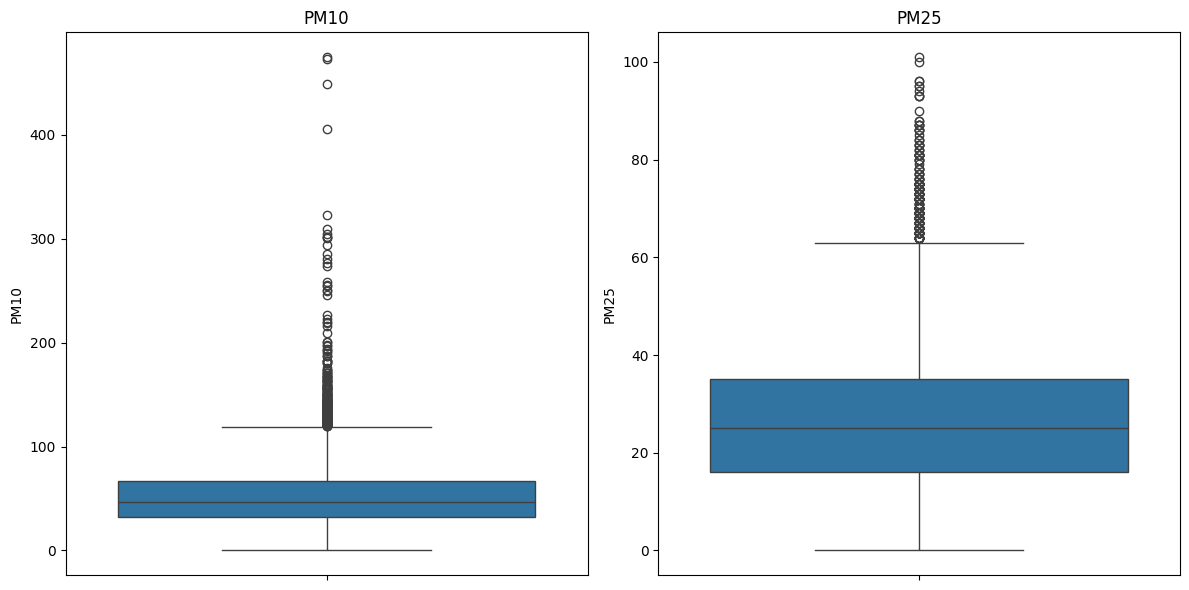

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))


sns.boxplot(data=total16, y='PM10', ax=axes[0])
axes[0].set_title('PM10')


sns.boxplot(data=total16, y='PM25', ax=axes[1])
axes[1].set_title('PM25')


plt.tight_layout()
plt.show()

In [ ]:
total16.describe()

,Time,PM10,PM25,temp,Precipitation,Wind_direction,Wind_corr,SO2,CO,O3,NO2,지점,WingSpeed,Month,Day
count,8781,8781.000000,8781.000000,8781.000000,8781.000000,8781.000000,8781.000000,8656.000000,8642.000000,8589.000000,8657.000000,8781.0,8781.000000,8781.000000,8781.000000
mean,2016-07-02 00:04:39.603689472,52.081597,26.747922,13.584364,0.113311,199.449949,5.103633,0.004237,0.508979,0.019214,0.033178,108.0,2.276802,6.514520,15.754584
min,2016-01-01 00:00:00,0.000000,0.000000,-18.000000,0.000000,0.000000,1.000000,0.002000,0.200000,0.001000,0.003000,108.0,0.000000,1.000000,1.000000
25%,2016-04-01 12:00:00,32.000000,16.000000,3.900000,0.000000,70.000000,2.000000,0.004000,0.400000,0.005000,0.021000,108.0,1.400000,4.000000,8.000000
50%,2016-07-02 01:00:00,47.000000,25.000000,14.900000,0.000000,250.000000,6.000000,0.004000,0.500000,0.016000,0.031000,108.0,2.100000,7.000000,16.000000
75%,2016-10-01 12:00:00,67.000000,35.000000,23.200000,0.000000,290.000000,8.000000,0.005000,0.600000,0.028000,0.043000,108.0,3.000000,10.000000,23.000000
max,2016-12-31 23:00:00,475.000000,101.000000,36.400000,32.000000,360.000000,8.000000,0.011000,1.800000,0.110000,0.114000,108.0,8.500000,12.000000,31.000000
std,NaN,31.138695,14.940696,11.431148,1.005886,115.339769,2.598574,0.001097,0.182508,0.016373,0.015835,0.0,1.199006,3.451608,8.811853


In [ ]:
# CORR 보기

lis = ['Month', 'PM10', 'PM25', 'temp', 'Precipitation', 'Wind_corr', 'SO2', 'CO', 'O3', 'NO2', 'WingSpeed']
corr16 = total16[lis]
corr17 = total17[lis]
corr18 = total18[lis]
corr19 = total19[lis]

corr1610 = corr16.corr(method = 'pearson')[['PM10']].sort_values(by = 'PM10', ascending = False)
corr1625 = corr16.corr(method = 'pearson')[['PM25']].sort_values(by = 'PM25', ascending = False)


corr1710 = corr16.corr(method = 'pearson')[['PM10']].sort_values(by = 'PM10', ascending = False)
corr1725 = corr16.corr(method = 'pearson')[['PM25']].sort_values(by = 'PM25', ascending = False)

corr1810 = corr16.corr(method = 'pearson')[['PM10']].sort_values(by = 'PM10', ascending = False)
corr1825 = corr16.corr(method = 'pearson')[['PM25']].sort_values(by = 'PM25', ascending = False)

corr1910 = corr16.corr(method = 'pearson')[['PM10']].sort_values(by = 'PM10', ascending = False)
corr1925 = corr16.corr(method = 'pearson')[['PM25']].sort_values(by = 'PM25', ascending = False)

corr1625

,PM25
PM25,1.000000
PM10,0.748749
CO,0.560753
NO2,0.393259
SO2,0.324279
Wind_corr,0.088883
Month,0.006815
O3,-0.013350
temp,-0.015200
Precipitation,-0.072051


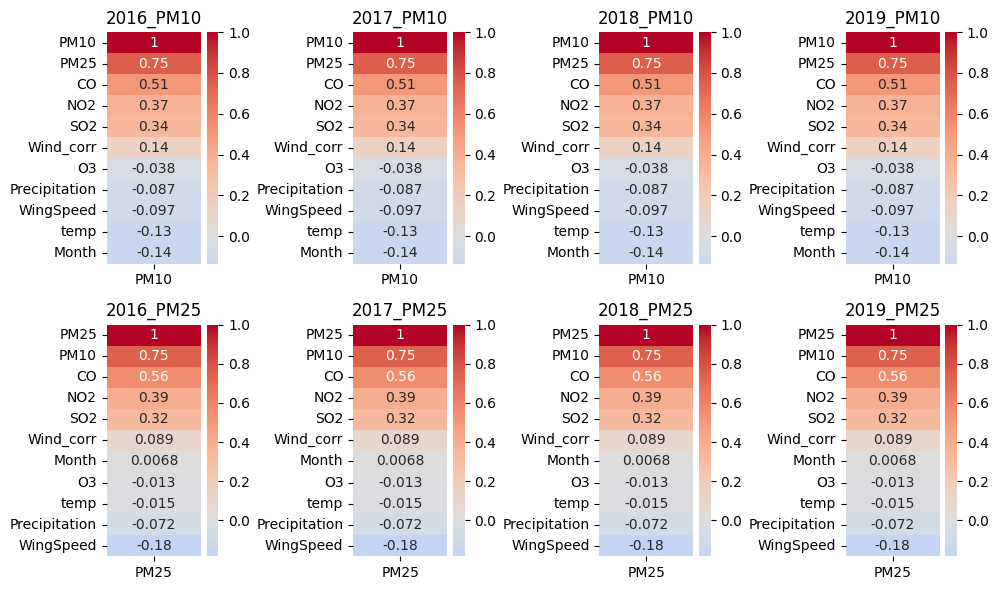

In [ ]:
plt.figure(figsize=(10, 6))

plt.subplot(2, 4, 1)
sns.heatmap(corr1610, annot=True, cmap='coolwarm', center=0)
plt.title('2016_PM10')

plt.subplot(2, 4, 2)
sns.heatmap(corr1710, annot=True, cmap='coolwarm', center=0)
plt.title('2017_PM10')

plt.subplot(2, 4, 3)
sns.heatmap(corr1710, annot=True, cmap='coolwarm', center=0)
plt.title('2018_PM10')

plt.subplot(2, 4, 4)
sns.heatmap(corr1810, annot=True, cmap='coolwarm', center=0, )
plt.title('2019_PM10')

plt.subplot(2, 4, 5)
sns.heatmap(corr1625, annot=True, cmap='coolwarm', center=0)
plt.title('2016_PM25')

plt.subplot(2, 4, 6)
sns.heatmap(corr1725, annot=True, cmap='coolwarm', center=0)
plt.title('2017_PM25')

plt.subplot(2, 4, 7)
sns.heatmap(corr1725, annot=True, cmap='coolwarm', center=0)
plt.title('2018_PM25')

plt.subplot(2, 4, 8)
sns.heatmap(corr1825, annot=True, cmap='coolwarm', center=0, )
plt.title('2019_PM25')

plt.tight_layout()

In [ ]:
fil1 = total16
fil2 = total17
fil3 = total18
fil4 = total19

#### 연도별 미세먼지 초미세먼지

Text(0.6, 0.85, '150 <  PM10: 94')

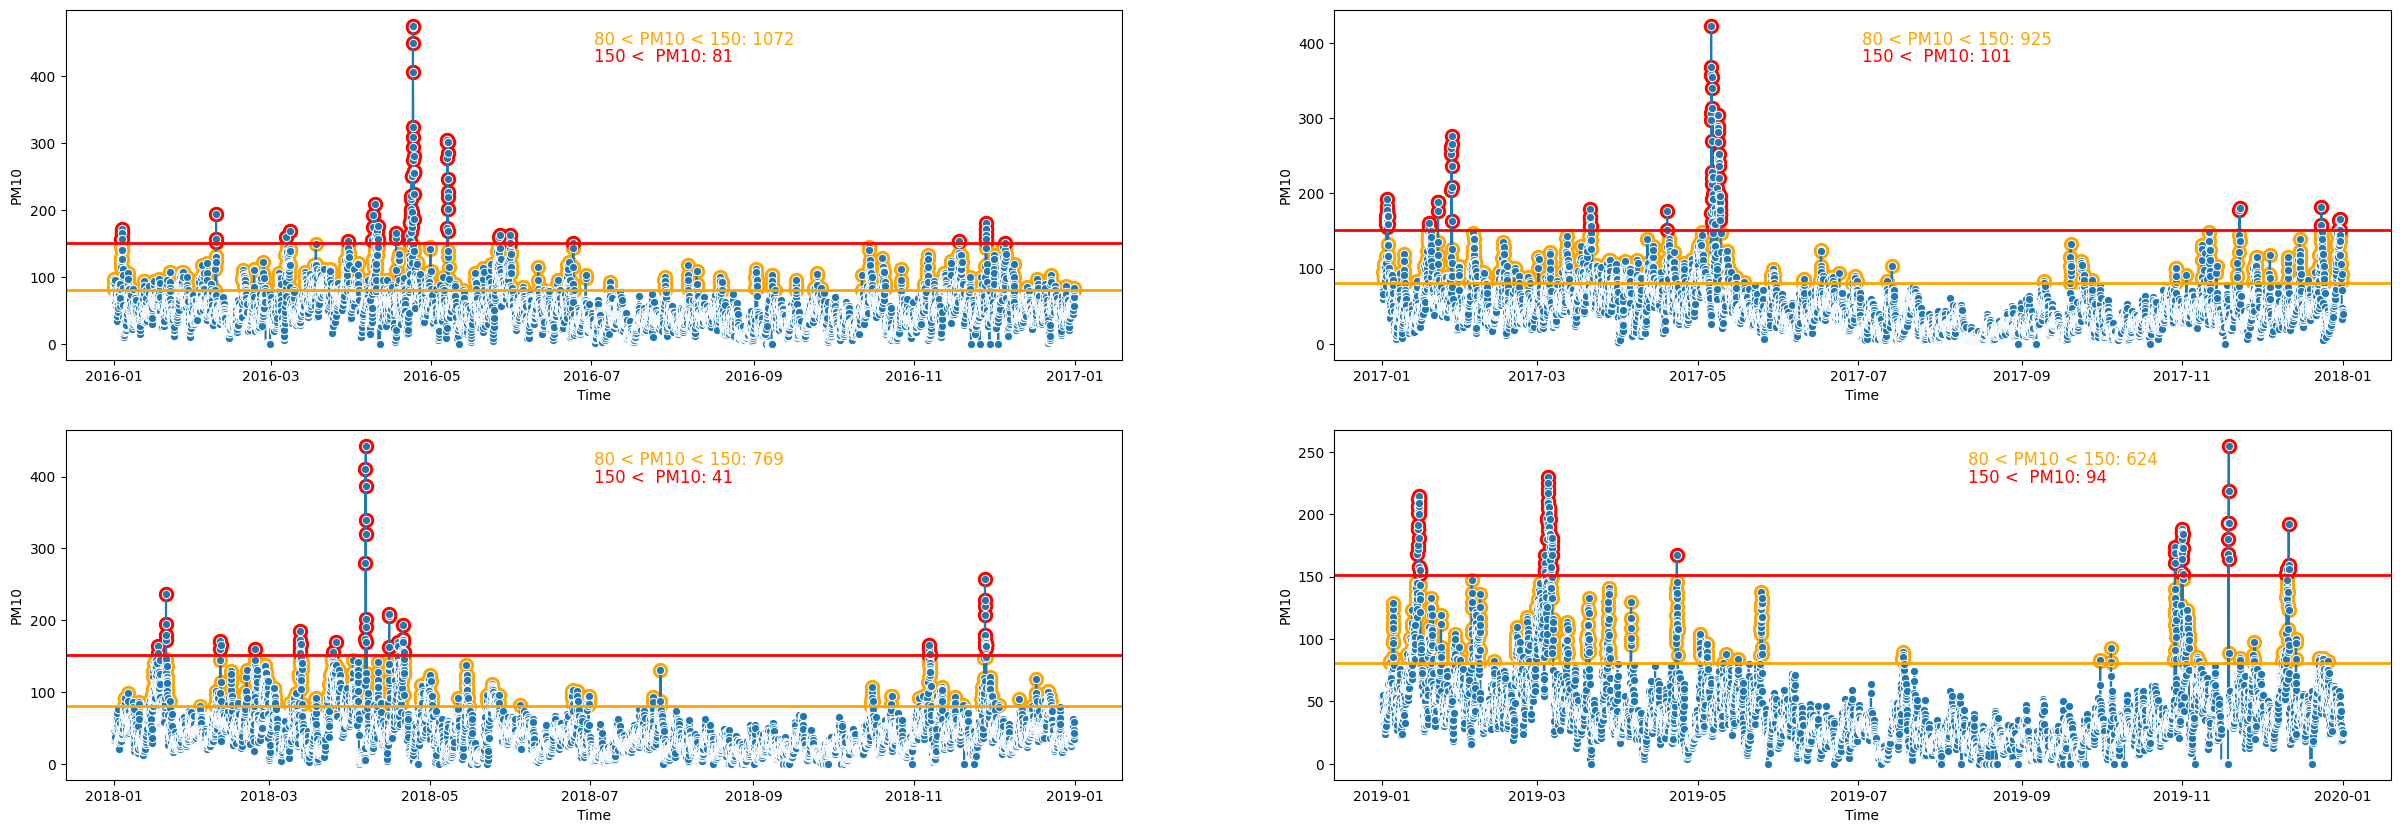

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(30, 10))



# 16년 1분기

x1 = fil1['Time']
y1 = fil1['PM10']
mask1 = y1 > 80
mask2 = y1 > 150
sns.lineplot(ax = axs[0, 0], data = fil1, x = x1, y = y1, marker = 'o')
axs[0, 0].axhline(y = 81, color = 'orange', linestyle = '-', linewidth = 2)
axs[0, 0].axhline(y = 151, color = 'red', linestyle = '-', linewidth = 2)
axs[0, 0].scatter(x1[mask1], y1[mask1], color = 'orange', s = 100)
axs[0, 0].scatter(x1[mask2], y1[mask2], color = 'red', s = 100)
a = fil1[(fil1['PM10'] > 80) & (fil1['PM10'] <150)].value_counts().sum()
b = fil1[fil1['PM10'] > 150].value_counts().sum()
axs[0, 0].text(0.5, 0.9, f'80 < PM10 < 150: {a}', transform=axs[0, 0].transAxes, fontsize=12, color='orange')
axs[0, 0].text(0.5, 0.85, f'150 <  PM10: {b}', transform=axs[0, 0].transAxes, fontsize=12, color='red')

# 16년 2분기

x1 = fil2['Time']
y1 = fil2['PM10']
mask1 = y1 > 80
mask2 = y1 > 150
sns.lineplot(ax = axs[0, 1], data = fil2, x = x1, y = y1, marker = 'o')
axs[0, 1].axhline(y = 81, color = 'orange', linestyle = '-', linewidth = 2)
axs[0, 1].axhline(y = 151, color = 'red', linestyle = '-', linewidth = 2)
axs[0, 1].scatter(x1[mask1], y1[mask1], color = 'orange', s = 100)
axs[0, 1].scatter(x1[mask2], y1[mask2], color = 'red', s = 100)
a = fil2[(fil2['PM10'] > 80) & (fil2['PM10'] <150)].value_counts().sum()
b = fil2[fil2['PM10'] > 150].value_counts().sum()
axs[0, 1].text(0.5, 0.9, f'80 < PM10 < 150: {a}', transform=axs[0, 1].transAxes, fontsize=12, color='orange')
axs[0, 1].text(0.5, 0.85, f'150 <  PM10: {b}', transform=axs[0, 1].transAxes, fontsize=12, color='red')

# 16년 3분기

x1 = fil3['Time']
y1 = fil3['PM10']
mask1 = y1 > 80
mask2 = y1 > 150
sns.lineplot(ax = axs[1, 0], data = fil3, x = x1, y = y1, marker = 'o')
axs[1, 0].axhline(y = 81, color = 'orange', linestyle = '-', linewidth = 2)
axs[1, 0].axhline(y = 151, color = 'red', linestyle = '-', linewidth = 2)
axs[1, 0].scatter(x1[mask1], y1[mask1], color = 'orange', s = 100)
axs[1, 0].scatter(x1[mask2], y1[mask2], color = 'red', s = 100)
a = fil3[(fil3['PM10'] > 80) & (fil3['PM10'] <150)].value_counts().sum()
b = fil3[fil3['PM10'] > 150].value_counts().sum()
axs[1, 0].text(0.5, 0.9, f'80 < PM10 < 150: {a}', transform=axs[1, 0].transAxes, fontsize=12, color='orange')
axs[1, 0].text(0.5, 0.85, f'150 <  PM10: {b}', transform=axs[1, 0].transAxes, fontsize=12, color='red')

# 16년 4분기

x1 = fil4['Time']
y1 = fil4['PM10']
mask1 = y1 > 80
mask2 = y1 > 150
sns.lineplot(ax = axs[1, 1], data = fil4, x = x1, y = y1, marker = 'o')
axs[1, 1].axhline(y = 81, color = 'orange', linestyle = '-', linewidth = 2)
axs[1, 1].axhline(y = 151, color = 'red', linestyle = '-', linewidth = 2)
axs[1, 1].scatter(x1[mask1], y1[mask1], color = 'orange', s = 100)
axs[1, 1].scatter(x1[mask2], y1[mask2], color = 'red', s = 100)
a = fil4[(fil4['PM10'] > 80) & (fil4['PM10'] <150)].value_counts().sum()
b = fil4[fil4['PM10'] > 150].value_counts().sum()
axs[1, 1].text(0.6, 0.9, f'80 < PM10 < 150: {a}', transform=axs[1, 1].transAxes, fontsize=12, color='orange')
axs[1, 1].text(0.6, 0.85, f'150 <  PM10: {b}', transform=axs[1, 1].transAxes, fontsize=12, color='red')

Text(0.6, 0.85, '76 <  PM25: 284')

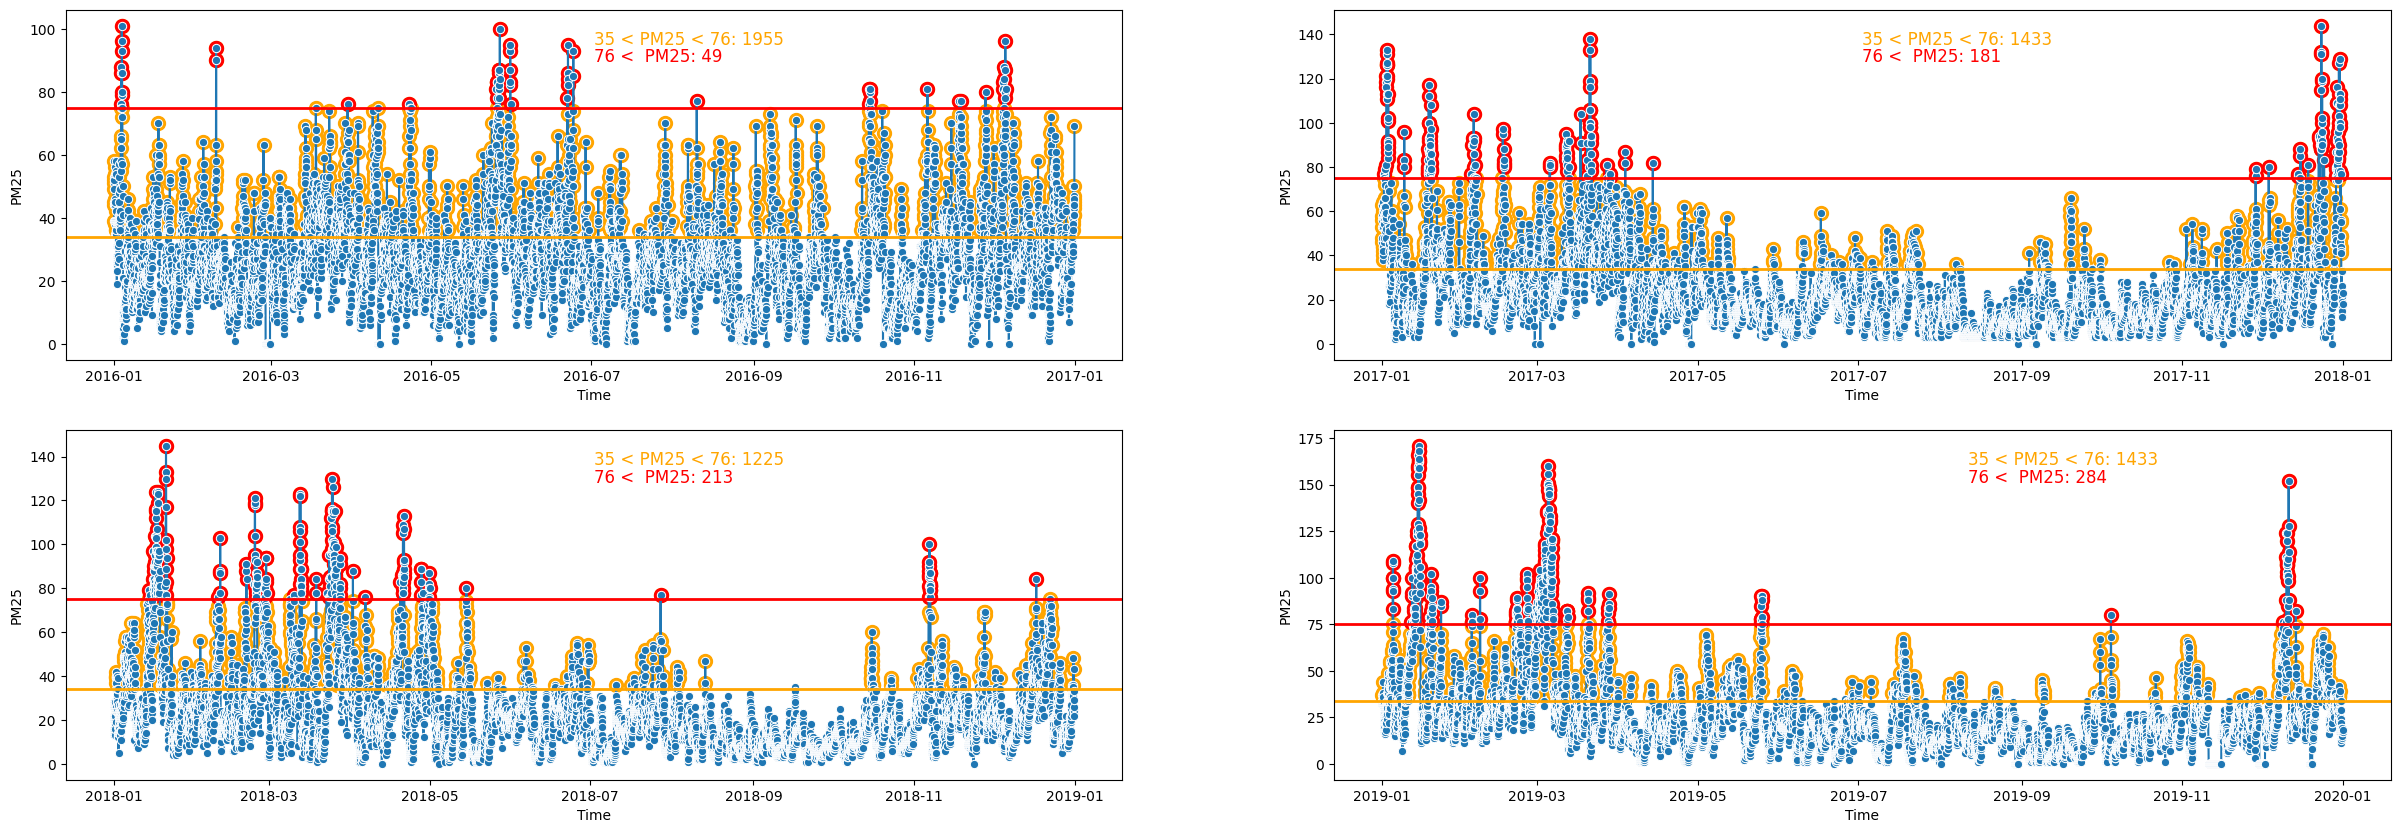

In [ ]:


fig, axs = plt.subplots(2, 2, figsize=(30, 10))



# 16년 1분기

x1 = fil1['Time']
y1 = fil1['PM25']
mask1 = y1 > 35
mask2 = y1 > 75
sns.lineplot(ax = axs[0, 0], data = fil1, x = x1, y = y1, marker = 'o')
axs[0, 0].axhline(y = 34, color = 'orange', linestyle = '-', linewidth = 2)
axs[0, 0].axhline(y = 75, color = 'red', linestyle = '-', linewidth = 2)
axs[0, 0].scatter(x1[mask1], y1[mask1], color = 'orange', s = 100)
axs[0, 0].scatter(x1[mask2], y1[mask2], color = 'red', s = 100)
a = fil1[(fil1['PM25'] > 35) & (fil1['PM25'] < 76)].value_counts().sum()
b = fil1[fil1['PM25'] > 75].value_counts().sum()
axs[0, 0].text(0.5, 0.9, f'35 < PM25 < 76: {a}', transform=axs[0, 0].transAxes, fontsize=12, color='orange')
axs[0, 0].text(0.5, 0.85, f'76 <  PM25: {b}', transform=axs[0, 0].transAxes, fontsize=12, color='red')

# 16년 2분기

x1 = fil2['Time']
y1 = fil2['PM25']
mask1 = y1 > 35
mask2 = y1 > 75
sns.lineplot(ax = axs[0, 1], data = fil2, x = x1, y = y1, marker = 'o')
axs[0, 1].axhline(y = 34, color = 'orange', linestyle = '-', linewidth = 2)
axs[0, 1].axhline(y = 75, color = 'red', linestyle = '-', linewidth = 2)
axs[0, 1].scatter(x1[mask1], y1[mask1], color = 'orange', s = 100)
axs[0, 1].scatter(x1[mask2], y1[mask2], color = 'red', s = 100)
a = fil2[(fil2['PM25'] > 35) & (fil2['PM25'] < 76)].value_counts().sum()
b = fil2[fil2['PM25'] > 75].value_counts().sum()
axs[0, 1].text(0.5, 0.9, f'35 < PM25 < 76: {a}', transform=axs[0, 1].transAxes, fontsize=12, color='orange')
axs[0, 1].text(0.5, 0.85, f'76 <  PM25: {b}', transform=axs[0, 1].transAxes, fontsize=12, color='red')

# 16년 3분기

x1 = fil3['Time']
y1 = fil3['PM25']
mask1 = y1 > 35
mask2 = y1 > 75
sns.lineplot(ax = axs[1, 0], data = fil3, x = x1, y = y1, marker = 'o')
axs[1, 0].axhline(y = 34, color = 'orange', linestyle = '-', linewidth = 2)
axs[1, 0].axhline(y = 75, color = 'red', linestyle = '-', linewidth = 2)
axs[1, 0].scatter(x1[mask1], y1[mask1], color = 'orange', s = 100)
axs[1, 0].scatter(x1[mask2], y1[mask2], color = 'red', s = 100)
a = fil3[(fil3['PM25'] > 35) & (fil3['PM25'] < 76)].value_counts().sum()
b = fil3[fil3['PM25'] > 75].value_counts().sum()
axs[1, 0].text(0.5, 0.9, f'35 < PM25 < 76: {a}', transform=axs[1, 0].transAxes, fontsize=12, color='orange')
axs[1, 0].text(0.5, 0.85, f'76 <  PM25: {b}', transform=axs[1, 0].transAxes, fontsize=12, color='red')

# 16년 4분기

x1 = fil4['Time']
y1 = fil4['PM25']
mask1 = y1 > 35
mask2 = y1 > 75
sns.lineplot(ax = axs[1, 1], data = fil4, x = x1, y = y1, marker = 'o')
axs[1, 1].axhline(y = 34, color = 'orange', linestyle = '-', linewidth = 2)
axs[1, 1].axhline(y = 75, color = 'red', linestyle = '-', linewidth = 2)
axs[1, 1].scatter(x1[mask1], y1[mask1], color = 'orange', s = 100)
axs[1, 1].scatter(x1[mask2], y1[mask2], color = 'red', s = 100)
a = fil4[(fil4['PM25'] > 35) & (fil4['PM25'] < 76)].value_counts().sum()
b = fil4[fil4['PM25'] > 75].value_counts().sum()
axs[1, 1].text(0.6, 0.9, f'35 < PM25 < 76: {a}', transform=axs[1, 1].transAxes, fontsize=12, color='orange')
axs[1, 1].text(0.6, 0.85, f'76 <  PM25: {b}', transform=axs[1, 1].transAxes, fontsize=12, color='red')

In [ ]:
# 일별 평균 미세먼지, 초미세먼지 농도

df16_agg = total16.groupby(['Month', 'Day'])[['PM10', 'PM25']].mean().reset_index()
df17_agg = total17.groupby(['Month', 'Day'])[['PM10', 'PM25']].mean().reset_index()
df18_agg = total18.groupby(['Month', 'Day'])[['PM10', 'PM25']].mean().reset_index()
df19_agg = total19.groupby(['Month', 'Day'])[['PM10', 'PM25']].mean().reset_index()

df16_agg

,Month,Day,PM10,PM25
0,1,1,77.750000,46.083333
1,1,2,54.958333,31.291667
2,1,3,94.041667,54.000000
3,1,4,82.166667,41.500000
4,1,5,28.583333,11.875000
...,...,...,...,...
361,12,27,48.145833,29.333333
362,12,28,53.625000,26.625000
363,12,29,41.375000,17.500000
364,12,30,49.583333,25.791667


#### 계절적 편차

In [ ]:
# 월별 일별 미세먼지, 초미세먼지가 나쁨, 매우나쁨 df

moth16_pm10 =   df16_agg[df16_agg['PM10'] > 80].reset_index(drop = True)
moth17_pm10 =   df17_agg[df17_agg['PM10'] > 80].reset_index(drop = True)
moth18_pm10 =   df18_agg[df18_agg['PM10'] > 80].reset_index(drop = True)
moth19_pm10 =   df19_agg[df19_agg['PM10'] > 80].reset_index(drop = True)

moth16_pm25 =   df16_agg[df16_agg['PM25'] > 35].reset_index(drop = True)
moth17_pm25 =   df17_agg[df17_agg['PM25'] > 35].reset_index(drop = True)
moth18_pm25 =   df18_agg[df18_agg['PM25'] > 35].reset_index(drop = True)
moth19_pm25 =   df19_agg[df19_agg['PM25'] > 35].reset_index(drop = True)

moth16_pm10

,Month,Day,PM10,PM25
0,1,3,94.041667,54.000000
1,1,4,82.166667,41.500000
2,1,26,87.041667,35.125000
3,2,19,93.791667,39.458333
4,3,6,84.625000,28.958333
5,3,7,116.958333,38.500000
6,3,17,85.520833,40.270833
7,3,19,80.625000,37.291667
8,3,20,85.750000,40.583333
9,3,21,89.250000,44.666667


In [ ]:
# 계절 비율을 알기 위해 컬럼 추가 : PM10
# help(pd.cut)
month_list = [moth16_pm10, moth17_pm10, moth18_pm10, moth19_pm10]

for df in month_list:
    test = []
    for i in range(len(df)):
        x = df['Month'][i] / 3
        if x < 1:
            test.append('winter')
        elif x >= 1 and x < 2:
            test.append('spring')
        elif x >= 2 and x < 3:
            test.append('summer')
        elif x >= 3 and x < 4:
            test.append('autumn')
        elif x == 4:
            test.append('winter')
    df['season'] = test
moth16_pm10

,Month,Day,PM10,PM25,season
0,1,3,94.041667,54.000000,winter
1,1,4,82.166667,41.500000,winter
2,1,26,87.041667,35.125000,winter
3,2,19,93.791667,39.458333,winter
4,3,6,84.625000,28.958333,spring
5,3,7,116.958333,38.500000,spring
6,3,17,85.520833,40.270833,spring
7,3,19,80.625000,37.291667,spring
8,3,20,85.750000,40.583333,spring
9,3,21,89.250000,44.666667,spring


In [ ]:
# 계절 비율을 알기 위해 컬럼 추가 : PM10

month_list = [moth16_pm25, moth17_pm25, moth18_pm25, moth19_pm25]

for df in month_list:
    test = []
    for i in range(len(df)):
        x = df['Month'][i] / 3
        if x < 1:
            test.append('winter')
        elif x >= 1 and x < 2:
            test.append('spring')
        elif x >= 2 and x < 3:
            test.append('summer')
        elif x >= 3 and x < 4:
            test.append('autumn')
        elif x == 4:
            test.append('winter')
    df['season'] = test
moth16_pm25

,Month,Day,PM10,PM25,season
0,1,1,77.750000,46.083333,winter
1,1,3,94.041667,54.000000,winter
2,1,4,82.166667,41.500000,winter
3,1,16,69.291667,38.000000,winter
4,1,17,65.166667,41.416667,winter
...,...,...,...,...,...
76,12,18,59.750000,36.916667,winter
77,12,23,59.916667,40.458333,winter
78,12,24,71.500000,53.125000,winter
79,12,25,55.625000,39.500000,winter


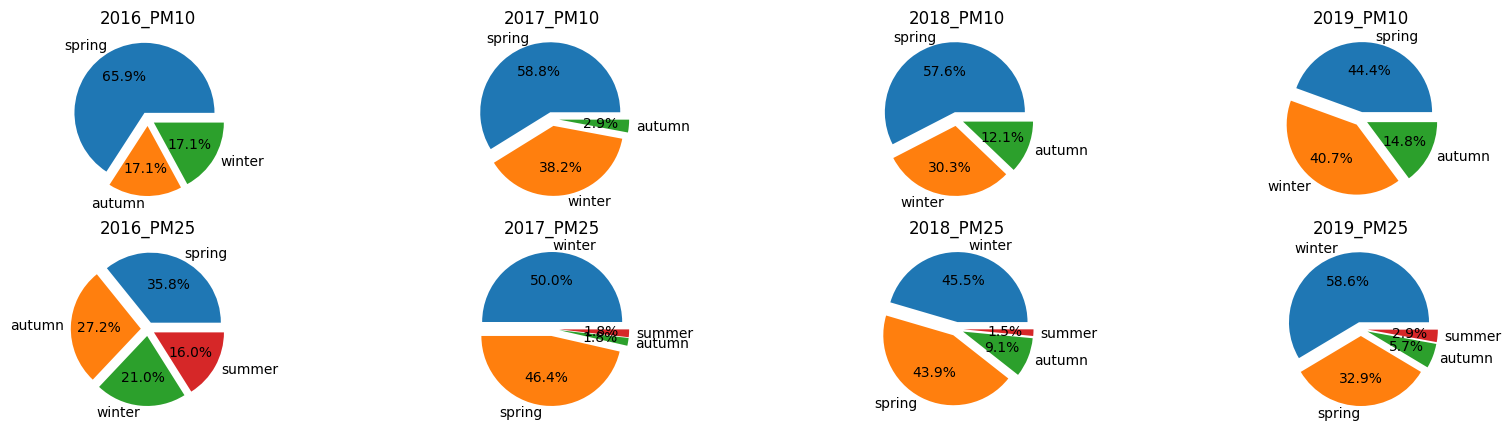

In [ ]:
# 계절 별 비율 보기 : PM10만 보기
fig, axes = plt.subplots(2, 4, figsize=(20, 5))


a = moth16_pm10.value_counts(subset='season').reset_index()
b = moth17_pm10.value_counts(subset='season').reset_index()
c = moth18_pm10.value_counts(subset='season').reset_index()
d = moth19_pm10.value_counts(subset='season').reset_index()
e = moth16_pm25.value_counts(subset='season').reset_index()
f = moth17_pm25.value_counts(subset='season').reset_index()
g = moth18_pm25.value_counts(subset='season').reset_index()
h = moth19_pm25.value_counts(subset='season').reset_index()




axes[0, 0].pie(a['count'], labels = a['season'], explode = [0.1, 0.1, 0.1], autopct = '%.1f%%')
axes[0, 0].set_title('2016_PM10')

axes[0, 1].pie(b['count'], labels = b['season'], explode = [0.1, 0.1, 0.1], autopct = '%.1f%%')
axes[0, 1].set_title('2017_PM10')

axes[0, 2].pie(c['count'], labels = c['season'], explode = [0.1, 0.1, 0.1], autopct = '%.1f%%')
axes[0, 2].set_title('2018_PM10')

axes[0, 3].pie(d['count'], labels = d['season'], explode = [0.1, 0.1, 0.1], autopct = '%.1f%%')
axes[0, 3].set_title('2019_PM10')


axes[1, 0].pie(e['count'], labels = e['season'], explode = [0.1, 0.1, 0.1, 0.1], autopct = '%.1f%%')
axes[1, 0].set_title('2016_PM25')

axes[1, 1].pie(f['count'], labels = f['season'], explode = [0.1, 0.1, 0.1, 0.1], autopct = '%.1f%%')
axes[1, 1].set_title('2017_PM25')

axes[1, 2].pie(g['count'], labels = g['season'], explode = [0.1, 0.1, 0.1, 0.1], autopct = '%.1f%%')
axes[1, 2].set_title('2018_PM25')

axes[1, 3].pie(h['count'], labels = h['season'], explode = [0.1, 0.1, 0.1, 0.1], autopct = '%.1f%%')
axes[1, 3].set_title('2019_PM25')

plt.show()

In [ ]:
df16_agg

,Month,Day,PM10,PM25
0,1,1,77.750000,46.083333
1,1,2,54.958333,31.291667
2,1,3,94.041667,54.000000
3,1,4,82.166667,41.500000
4,1,5,28.583333,11.875000
...,...,...,...,...
361,12,27,48.145833,29.333333
362,12,28,53.625000,26.625000
363,12,29,41.375000,17.500000
364,12,30,49.583333,25.791667


In [ ]:
    # 일 별 평균 미세먼지 초미세먼지가 나쁨인 날의 월 별 카운트 수

da_me_16_pm10 = df16_agg[df16_agg['PM10'] > 80].value_counts(subset = 'Month').to_frame().reset_index().sort_values( by = 'Month').reset_index(drop = True)
da_me_17_pm10 = df17_agg[df17_agg['PM10'] > 80].value_counts(subset = 'Month').to_frame().reset_index().sort_values( by = 'Month').reset_index(drop = True)
da_me_18_pm10 = df18_agg[df18_agg['PM10'] > 80].value_counts(subset = 'Month').to_frame().reset_index().sort_values( by = 'Month').reset_index(drop = True)
da_me_19_pm10 = df19_agg[df19_agg['PM10'] > 80].value_counts(subset = 'Month').to_frame().reset_index().sort_values( by = 'Month').reset_index(drop = True)

da_me_16_pm25 = df16_agg[df16_agg['PM25'] > 35].value_counts(subset = 'Month').to_frame().reset_index().sort_values( by = 'Month').reset_index(drop = True)
da_me_17_pm25 = df17_agg[df17_agg['PM25'] > 35].value_counts(subset = 'Month').to_frame().reset_index().sort_values( by = 'Month').reset_index(drop = True)
da_me_18_pm25 = df18_agg[df18_agg['PM25'] > 35].value_counts(subset = 'Month').to_frame().reset_index().sort_values( by = 'Month').reset_index(drop = True)
da_me_19_pm25 = df19_agg[df19_agg['PM25'] > 35].value_counts(subset = 'Month').to_frame().reset_index().sort_values( by = 'Month').reset_index(drop = True)

da_me_19_pm25

,Month,count
0,1,16
1,2,13
2,3,13
3,4,1
4,5,9
5,7,2
6,11,4
7,12,12


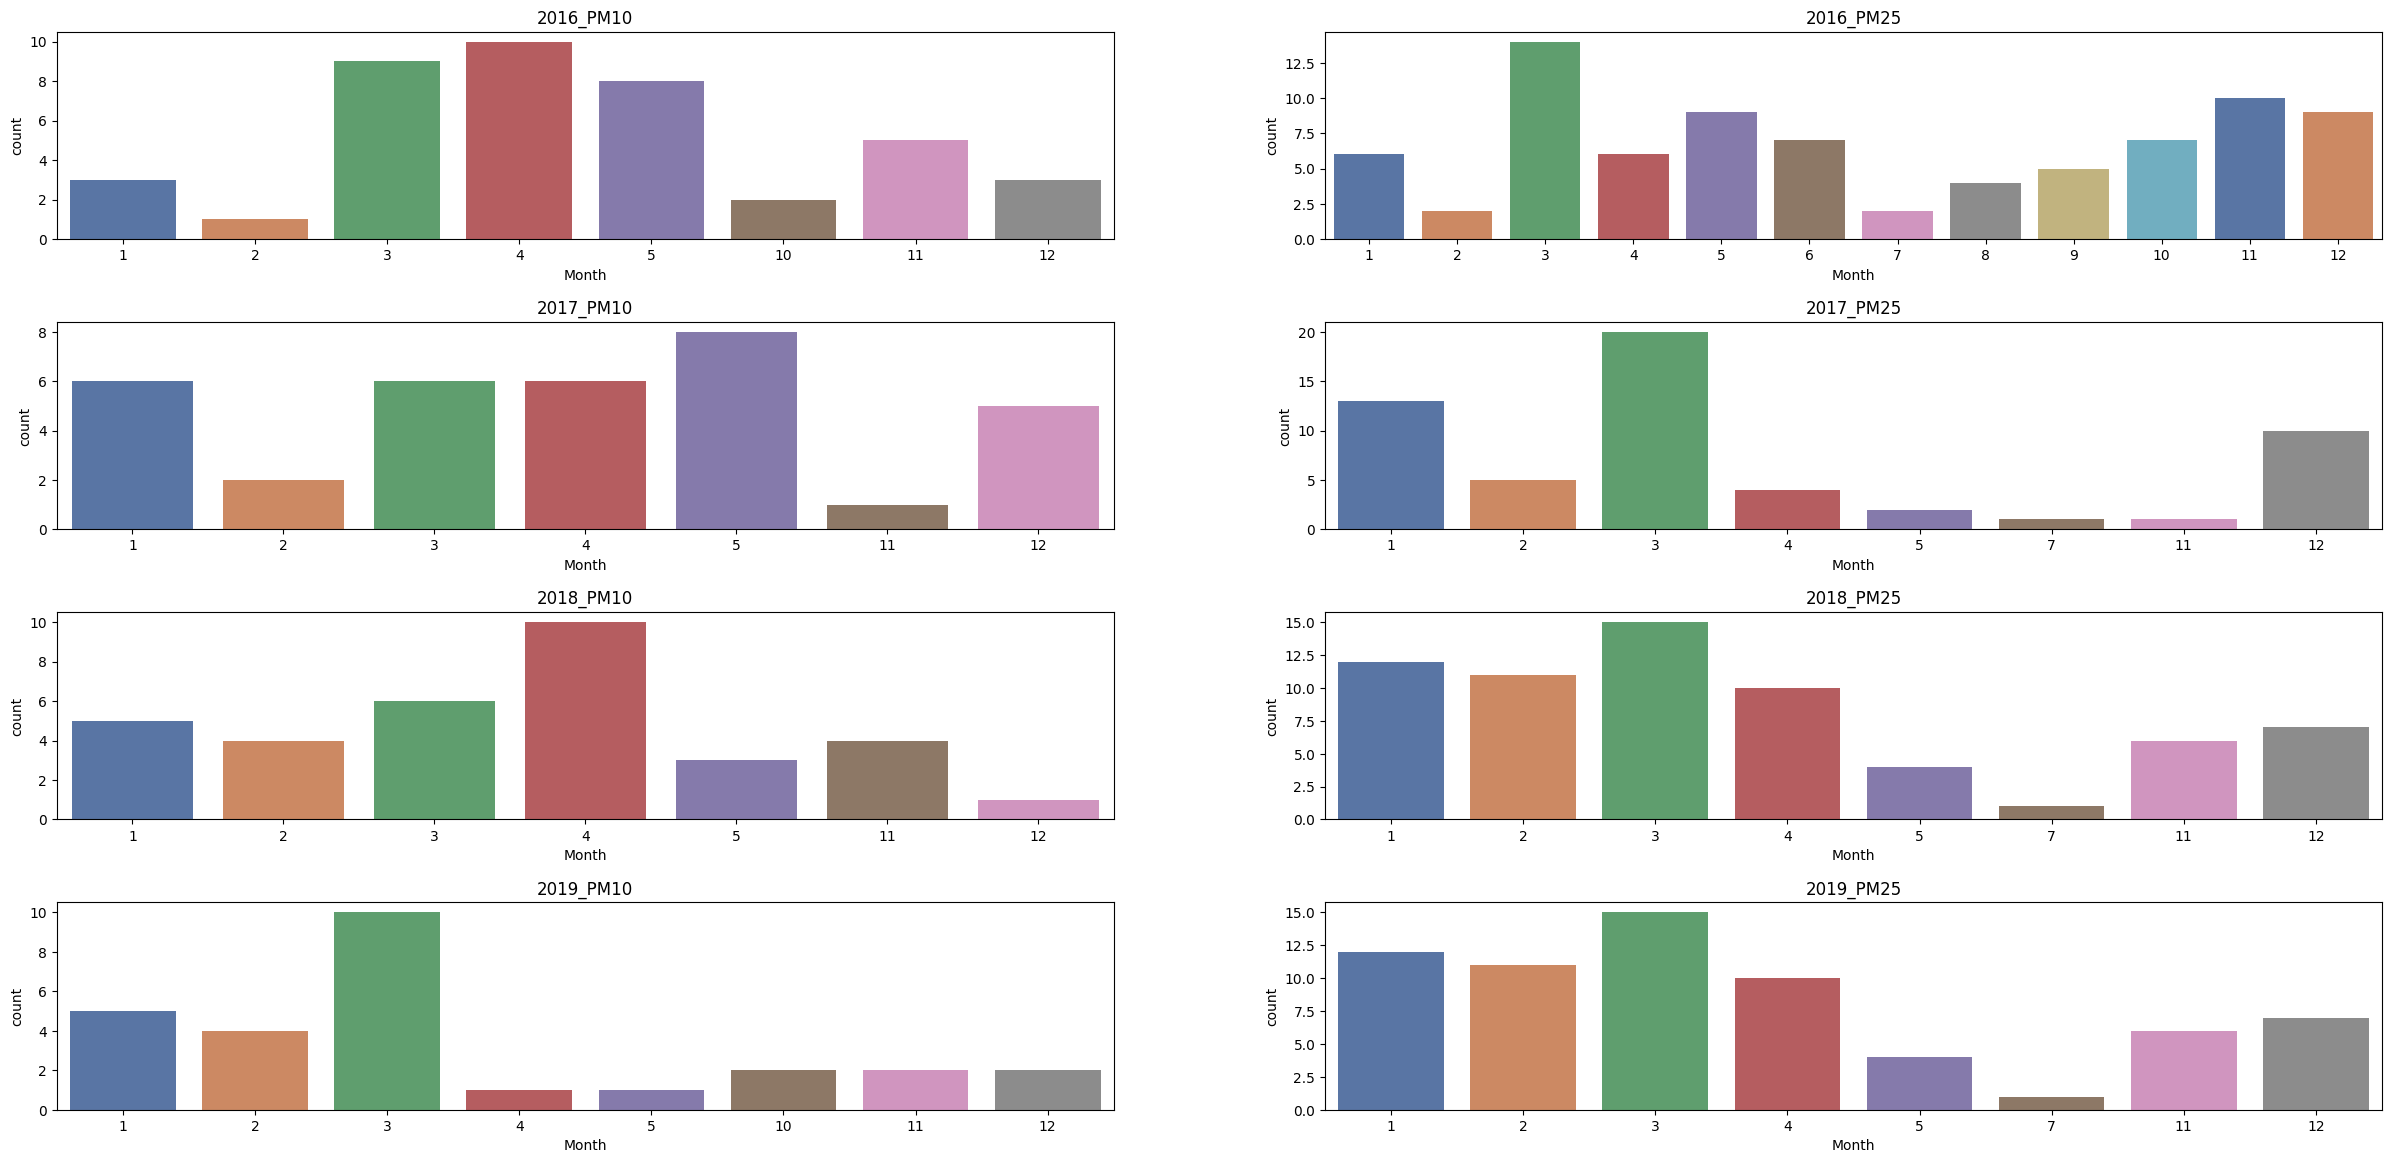

In [ ]:
# 일 별 평균 미세먼지 초미세먼지가 나쁨인 날의 월 별 카운트 수

fig, axs = plt.subplots(4, 2, figsize=(30, 14))

sns.barplot(ax = axs[0, 0], data = da_me_16_pm10, x = 'Month', y = 'count', hue = "Month", palette = 'deep', legend = False)
axs[0, 0].set_title('2016_PM10')
sns.barplot(ax = axs[0, 1], data = da_me_16_pm25, x = 'Month', y = 'count', hue = "Month", palette = 'deep', legend = False)
axs[0, 1].set_title('2016_PM25')

sns.barplot(ax = axs[1, 0], data = da_me_17_pm10, x = 'Month', y = 'count', hue = "Month", palette = 'deep', legend = False)
axs[1, 0].set_title('2017_PM10')
sns.barplot(ax = axs[1, 1], data = da_me_17_pm25, x = 'Month', y = 'count', hue = "Month", palette = 'deep', legend = False)
axs[1, 1].set_title('2017_PM25')

sns.barplot(ax = axs[2, 0], data = da_me_18_pm10, x = 'Month', y = 'count', hue = "Month", palette = 'deep', legend = False)
axs[2, 0].set_title('2018_PM10')
sns.barplot(ax = axs[2, 1], data = da_me_18_pm25, x = 'Month', y = 'count', hue = "Month", palette = 'deep', legend = False)
axs[2, 1].set_title('2018_PM25')

sns.barplot(ax = axs[3, 0], data = da_me_19_pm10, x = 'Month', y = 'count', hue = "Month", palette = 'deep', legend = False)
axs[3, 0].set_title('2019_PM10')
sns.barplot(ax = axs[3, 1], data = da_me_18_pm25, x = 'Month', y = 'count', hue = "Month", palette = 'deep', legend = False)
axs[3, 1].set_title('2019_PM25')


plt.subplots_adjust(wspace = 0.2, hspace = 0.4)

#### 월평균

<Axes: xlabel='Month', ylabel='PM10'>

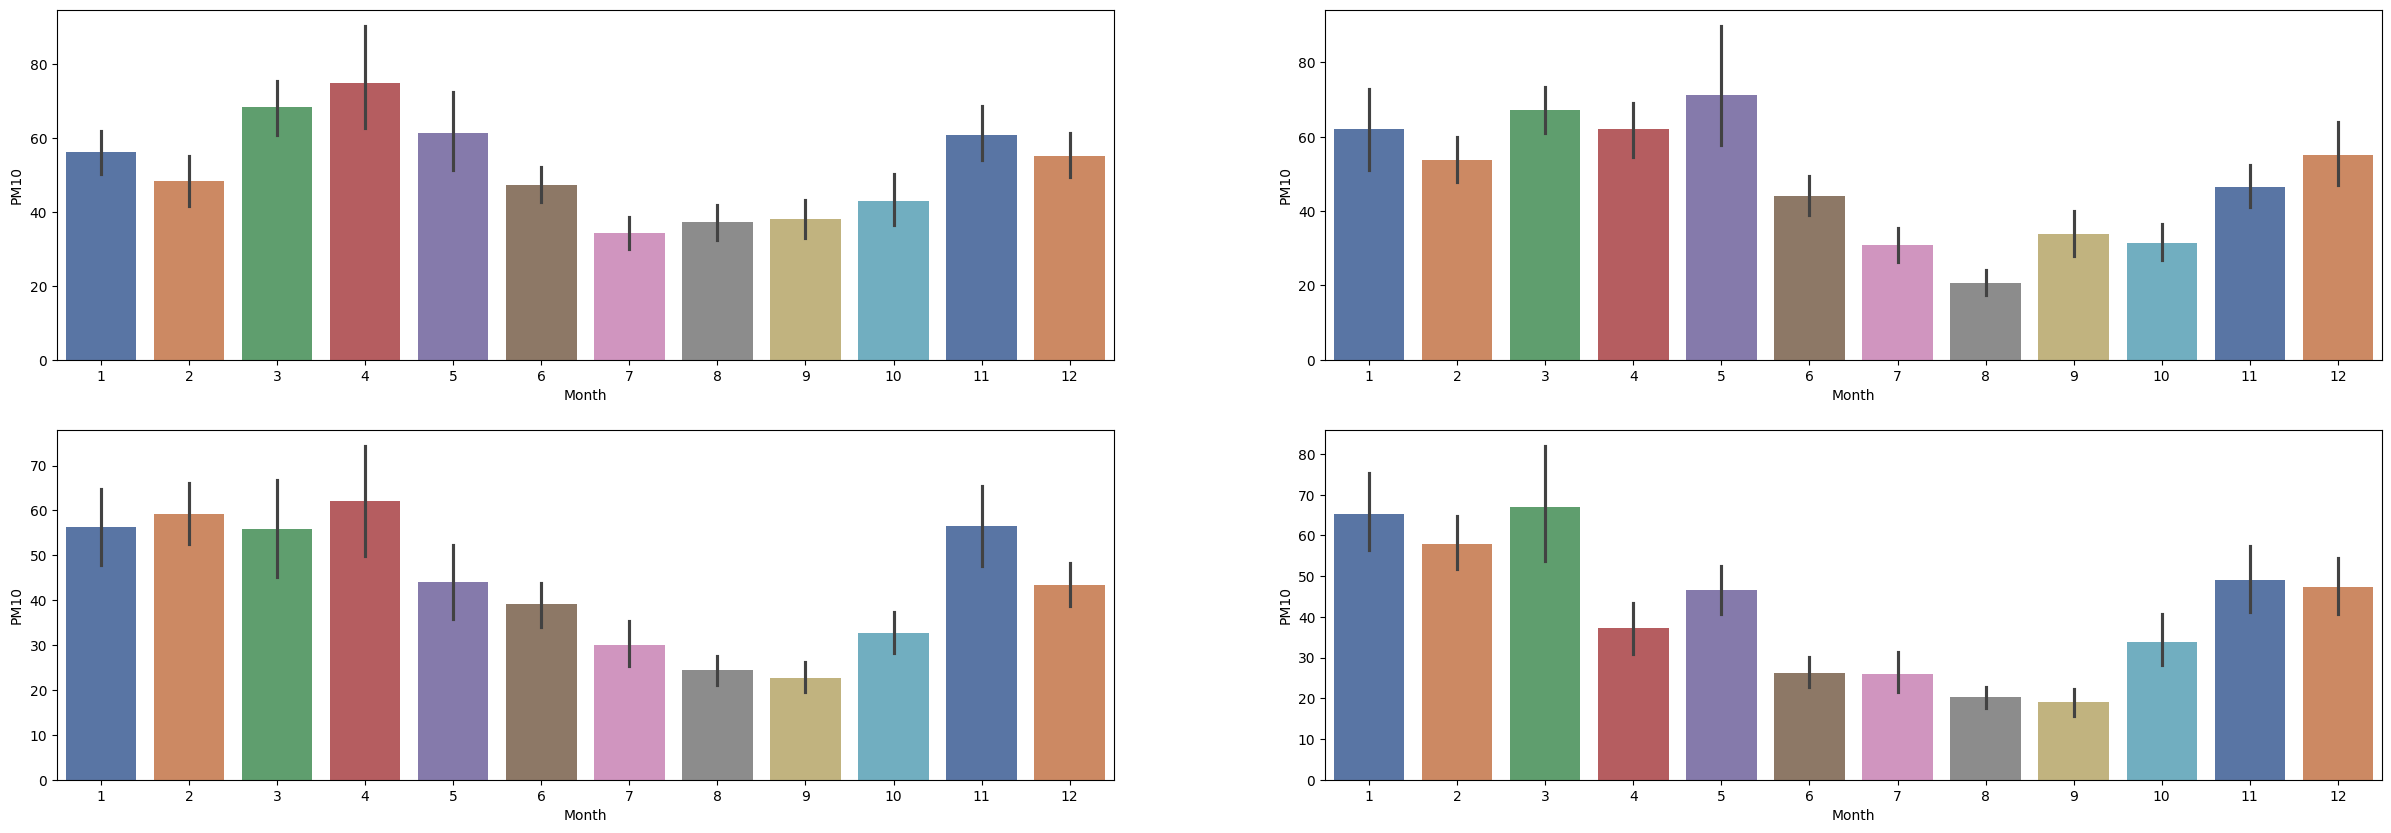

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(30, 10))

sns.barplot(ax = axs[0, 0], data = df16_agg, x = 'Month', y = 'PM10', hue = "Month", palette = 'deep', legend=False)
sns.barplot(ax = axs[0, 1], data = df17_agg, x = 'Month', y = 'PM10', hue = "Month", palette = 'deep', legend=False)
sns.barplot(ax = axs[1, 0], data = df18_agg, x = 'Month', y = 'PM10', hue = "Month", palette = 'deep', legend=False)
sns.barplot(ax = axs[1, 1], data = df19_agg, x = 'Month', y = 'PM10', hue = "Month", palette = 'deep', legend=False)

<Axes: xlabel='Month', ylabel='PM25'>

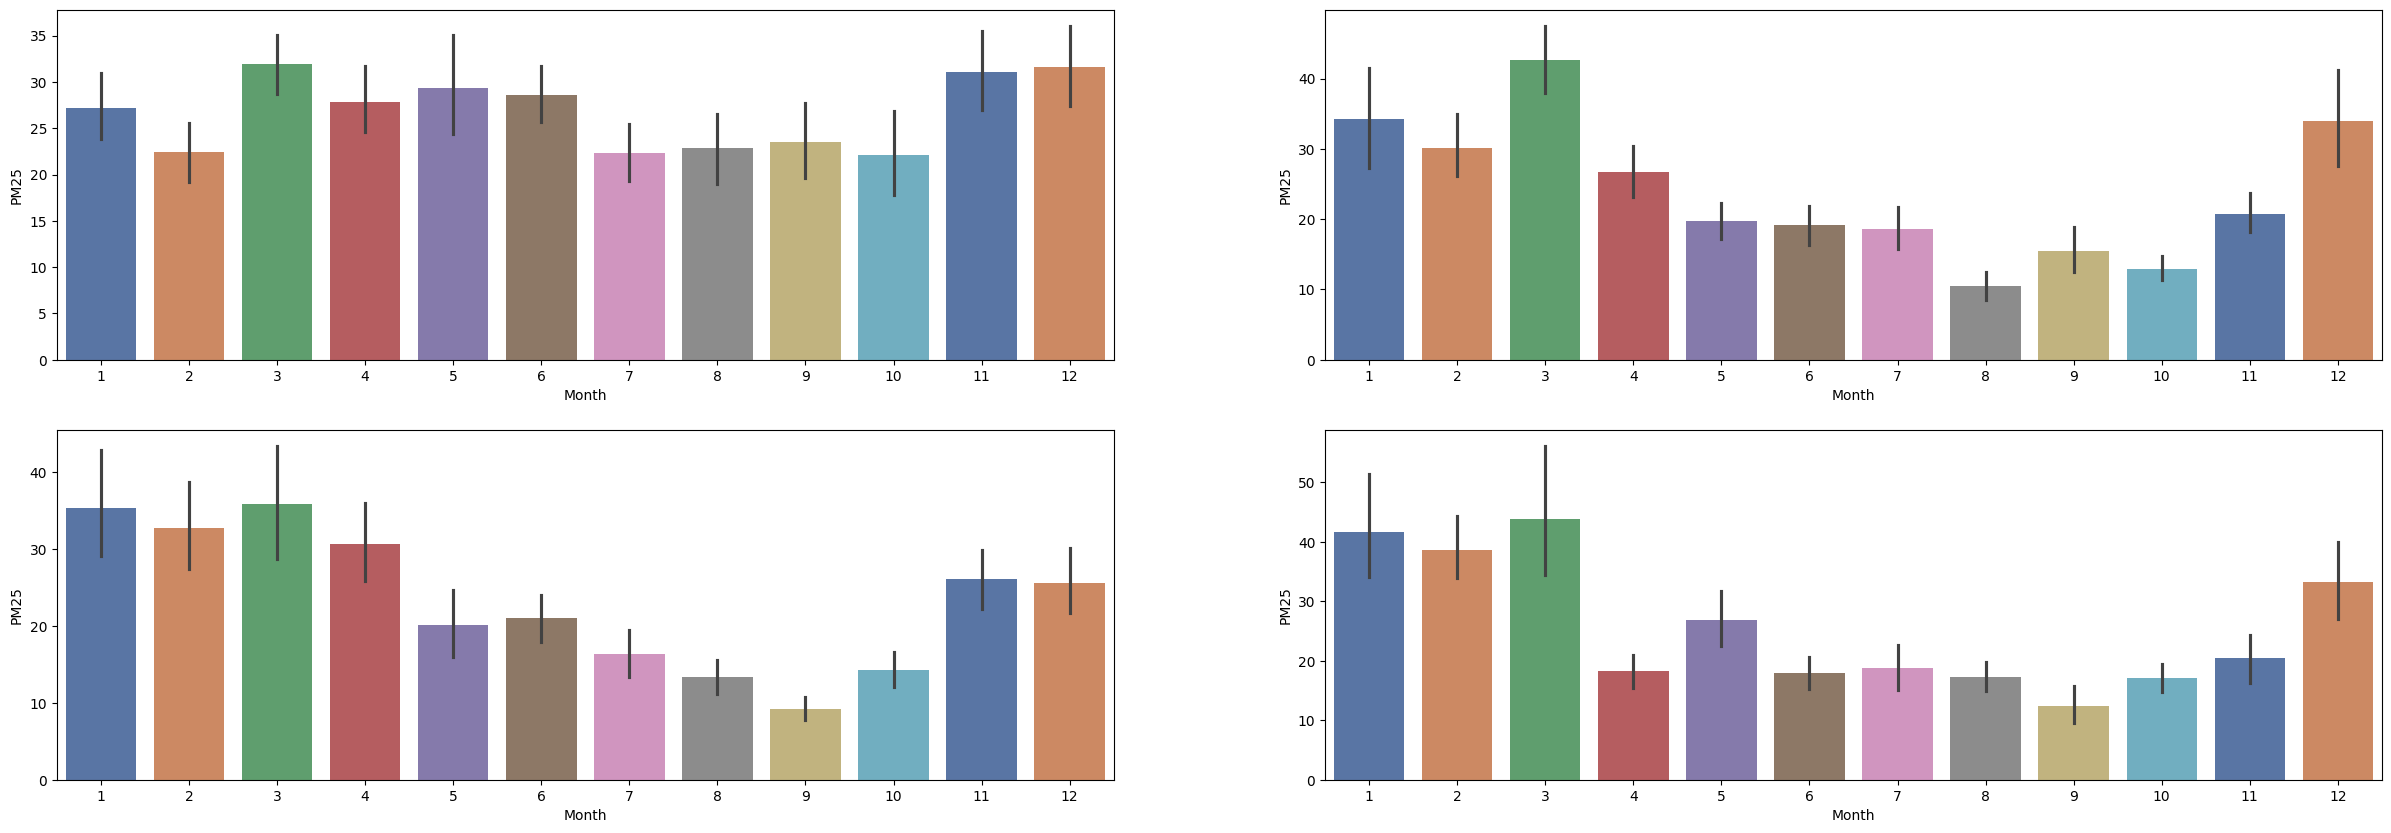

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(30, 10))

sns.barplot(ax = axs[0, 0], data = df16_agg, x = 'Month', y = 'PM25', hue = "Month", palette = 'deep', legend=False)
sns.barplot(ax = axs[0, 1], data = df17_agg, x = 'Month', y = 'PM25', hue = "Month", palette = 'deep', legend=False)
sns.barplot(ax = axs[1, 0], data = df18_agg, x = 'Month', y = 'PM25', hue = "Month", palette = 'deep', legend=False)
sns.barplot(ax = axs[1, 1], data = df19_agg, x = 'Month', y = 'PM25', hue = "Month", palette = 'deep', legend=False)

# 시간별 pm 농도 평균을 넣으면 좋겠다
